In [53]:
import pandas as pd

In [54]:
df=pd.read_csv("Financial Statements.csv")
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [55]:
print("Columns in the dataset:", df.columns)

# Standardizing column names 
df.columns = df.columns.str.strip().str.upper()


print("Unique values in the 'Company' column before cleaning:")
print(df['COMPANY'].unique()) 

# Cleaning the 'Company' column
df['COMPANY'] = df['COMPANY'].str.strip().str.upper()

company_mapping = {
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOG": "Alphabet (Google)",
    "PYPL": "PayPal",
    "AIG": "American International Group",
    "PCG": "PG&E",
    "SHLDQ": "Sears Holdings",
    "MCD": "McDonald's",
    "BCS": "Barclays",
    "NVDA": "NVIDIA",
    "INTC": "Intel",
    "AMZN": "Amazon"
}

df['COMPANY'] = df['COMPANY'].map(company_mapping)

df.to_csv("financial_data_cleaned.csv", index=False)

print(df.head())

Columns in the dataset: Index(['Year', 'Company ', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')
Unique values in the 'Company' column before cleaning:
['AAPL' 'MSFT' 'GOOG' 'PYPL' 'AIG' 'PCG' 'SHLDQ' 'MCD' 'BCS' 'NVDA' 'INTC'
 'AMZN']
   YEAR COMPANY CATEGORY  MARKET CAP(IN B USD)   REVENUE  GROSS PROFIT  \
0  2022   Apple       IT               2066.94  394328.0      170782.0   
1  2021   Apple       IT               2913.28  365817.0      152836.0   
2  2020   Apple       IT               2255.97  274515.0      104956.0   
3  2019   Apple       IT       

In [56]:
df['COMPANY'].unique()

array(['Apple', 'Microsoft', 'Alphabet (Google)', 'PayPal',
       'American International Group', 'PG&E', 'Sears Holdings',
       "McDonald's", 'Barclays', 'NVIDIA', 'Intel', 'Amazon'],
      dtype=object)

In [57]:
# Checking for null values
print(df.isnull().sum())


YEAR                                   0
COMPANY                                0
CATEGORY                               0
MARKET CAP(IN B USD)                   1
REVENUE                                0
GROSS PROFIT                           0
NET INCOME                             0
EARNING PER SHARE                      0
EBITDA                                 0
SHARE HOLDER EQUITY                    0
CASH FLOW FROM OPERATING               0
CASH FLOW FROM INVESTING               0
CASH FLOW FROM FINANCIAL ACTIVITIES    0
CURRENT RATIO                          0
DEBT/EQUITY RATIO                      0
ROE                                    0
ROA                                    0
ROI                                    0
NET PROFIT MARGIN                      0
FREE CASH FLOW PER SHARE               0
RETURN ON TANGIBLE EQUITY              0
NUMBER OF EMPLOYEES                    0
INFLATION RATE(IN US)                  0
dtype: int64


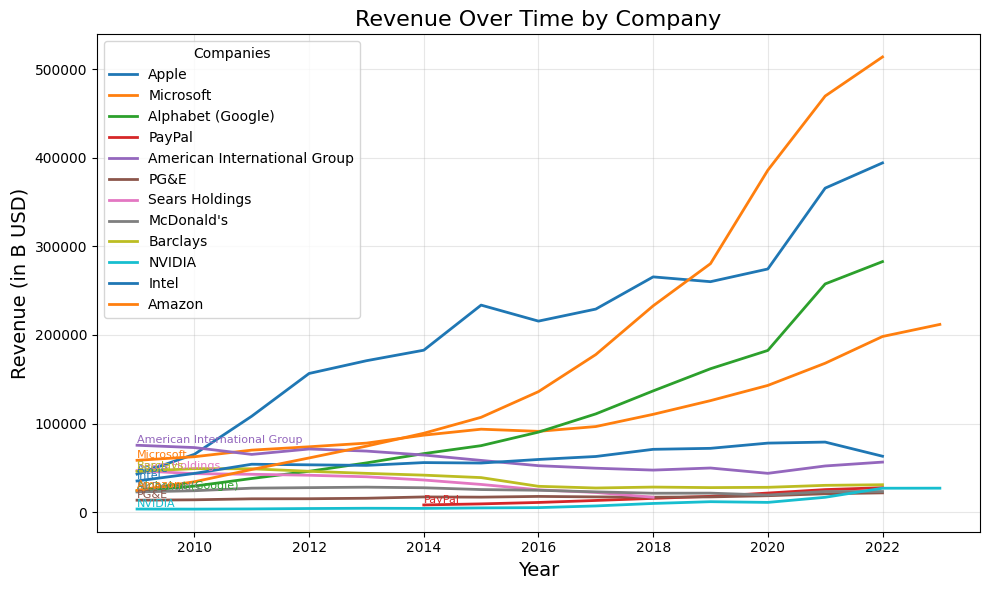

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_companies = df['COMPANY'].unique()
colors = sns.color_palette("tab10", len(unique_companies)) 

plt.figure(figsize=(10, 6))

for company, color in zip(unique_companies, colors):
    company_data = df[df['COMPANY'] == company]
    plt.plot(
        company_data['YEAR'], 
        company_data['REVENUE'], 
        label=company, 
        color=color,
        linewidth=2
    )
    # Adding company name above their respective lines
    last_point = company_data.iloc[-1]
    plt.text(
        x=last_point['YEAR'], 
        y=last_point['REVENUE'], 
        s=company, 
        color=color, 
        fontsize=8, 
        ha='left', 
        va='bottom'
    )

plt.title("Revenue Over Time by Company", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Revenue (in B USD)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title="Companies", fontsize=10, loc='upper left')  # Improved legend
plt.tight_layout()

plt.show()


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



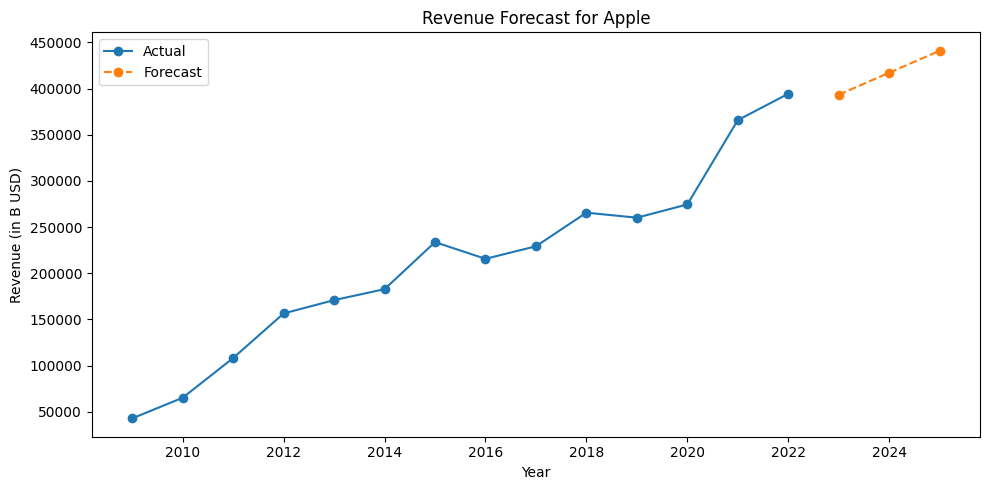

In [59]:




from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Selecting Apple to forcast
apple_data = df[df['COMPANY'] == 'Apple'].sort_values(by='YEAR')

# Fitting an Exponential Smoothing model
model = ExponentialSmoothing(apple_data['REVENUE'], trend='add', seasonal=None)
fit = model.fit()

# Predicting future revenue 
forecast_years = [apple_data['YEAR'].max() + i for i in range(1, 4)]
forecast = fit.forecast(steps=3)

# Combining the original and forecast data for plotting
forecast_df = pd.DataFrame({
    'YEAR': forecast_years,
    'REVENUE': forecast
})
forecast_data = pd.concat([apple_data, forecast_df])

plt.figure(figsize=(10, 5))
plt.plot(apple_data['YEAR'], apple_data['REVENUE'], label='Actual', marker='o')
plt.plot(forecast_df['YEAR'], forecast_df['REVENUE'], label='Forecast', linestyle='--', marker='o')
plt.title('Revenue Forecast for Apple')
plt.xlabel('Year')
plt.ylabel('Revenue (in B USD)')
plt.legend()
plt.tight_layout()
plt.show()


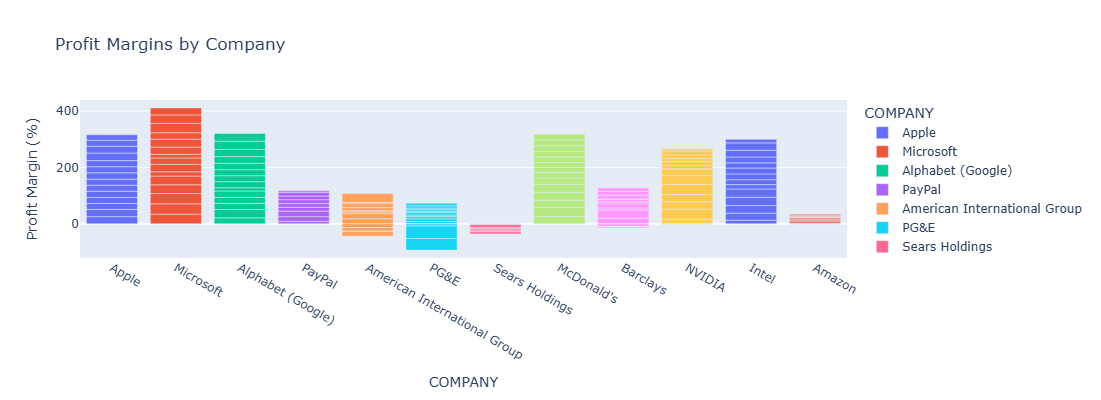

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [-5973.0, -6.0, -6084.0, -849.0, -12244.0]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [60]:
import plotly.express as px

# Computing key financial KPIs(Key Performance Indicator)
df['Profit Margin (%)'] = (df['NET INCOME'] / df['REVENUE']) * 100
df['Return on Equity (ROE)'] = (df['NET INCOME'] / df['SHARE HOLDER EQUITY']) * 100
df['Return on Assets (ROA)'] = (df['NET INCOME'] / df['ROA']) * 100

# Plot Profit Margin for each company
fig = px.bar(
    df,
    x='COMPANY',
    y='Profit Margin (%)',
    color='COMPANY',
    title='Profit Margins by Company',
    labels={'Profit Margin (%)': 'Profit Margin (%)'},
    height=400
)
fig.show()

# ROI vs Revenue (Scatter Plot)
fig = px.scatter(
    df,
    x='ROI',
    y='REVENUE',
    color='COMPANY',
    size='NET INCOME',
    title='ROI vs Revenue by Company',
    labels={'ROI': 'Return on Investment (%)', 'Revenue': 'Revenue (in B USD)'},
    height=400
)
fig.show()


In [61]:
df.columns = df.columns.str.strip().str.upper()
print(df.columns)  # Check again after cleaning


Index(['YEAR', 'COMPANY', 'CATEGORY', 'MARKET CAP(IN B USD)', 'REVENUE',
       'GROSS PROFIT', 'NET INCOME', 'EARNING PER SHARE', 'EBITDA',
       'SHARE HOLDER EQUITY', 'CASH FLOW FROM OPERATING',
       'CASH FLOW FROM INVESTING', 'CASH FLOW FROM FINANCIAL ACTIVITIES',
       'CURRENT RATIO', 'DEBT/EQUITY RATIO', 'ROE', 'ROA', 'ROI',
       'NET PROFIT MARGIN', 'FREE CASH FLOW PER SHARE',
       'RETURN ON TANGIBLE EQUITY', 'NUMBER OF EMPLOYEES',
       'INFLATION RATE(IN US)', 'PROFIT MARGIN (%)', 'RETURN ON EQUITY (ROE)',
       'RETURN ON ASSETS (ROA)'],
      dtype='object')


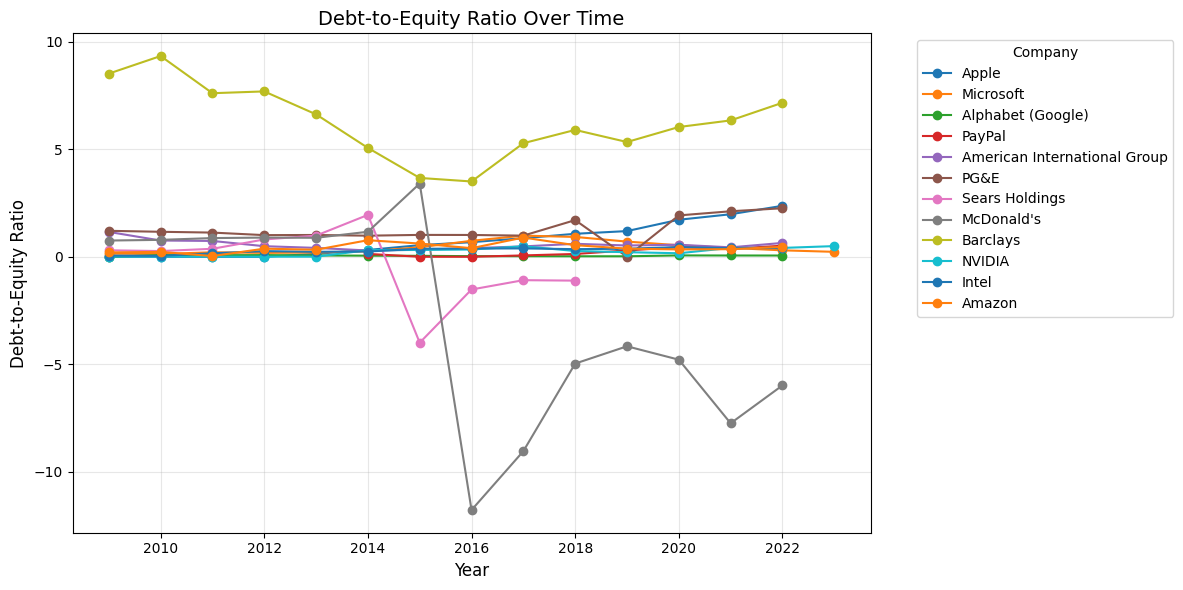

In [62]:
# Plot Debt-to-Equity Ratio Over Time
plt.figure(figsize=(12, 6))
for company in df['COMPANY'].unique():
    company_data = df[df['COMPANY'] == company]
    plt.plot(company_data['YEAR'], company_data['DEBT/EQUITY RATIO'], label=company, marker='o')

plt.title("Debt-to-Equity Ratio Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Debt-to-Equity Ratio", fontsize=12)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


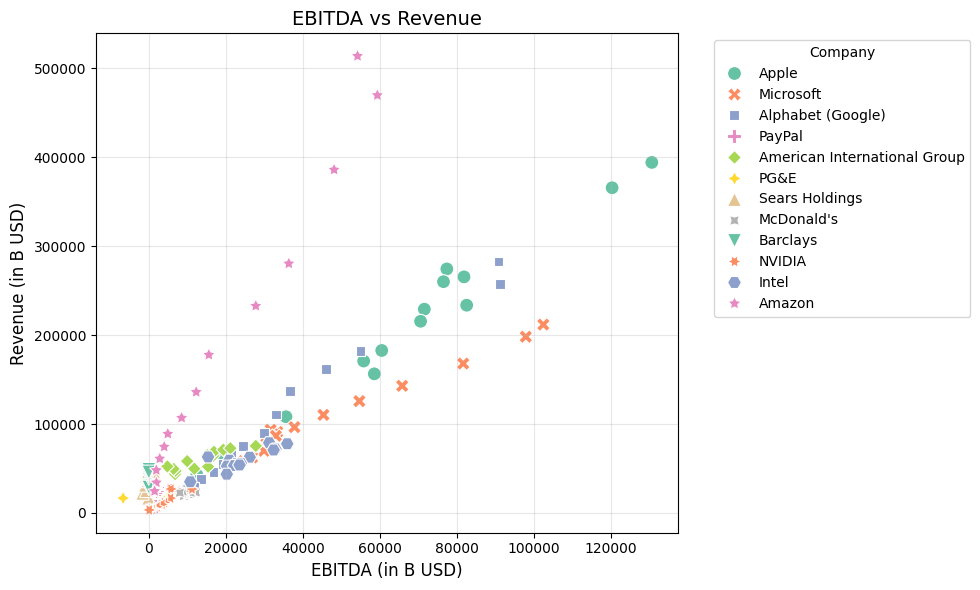

In [63]:
import seaborn as sns

# Scatter plot for EBITDA vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="EBITDA", 
    y="REVENUE", 
    hue="COMPANY", 
    style="COMPANY", 
    palette="Set2", 
    s=100
)
plt.title("EBITDA vs Revenue", fontsize=14)
plt.xlabel("EBITDA (in B USD)", fontsize=12)
plt.ylabel("Revenue (in B USD)", fontsize=12)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


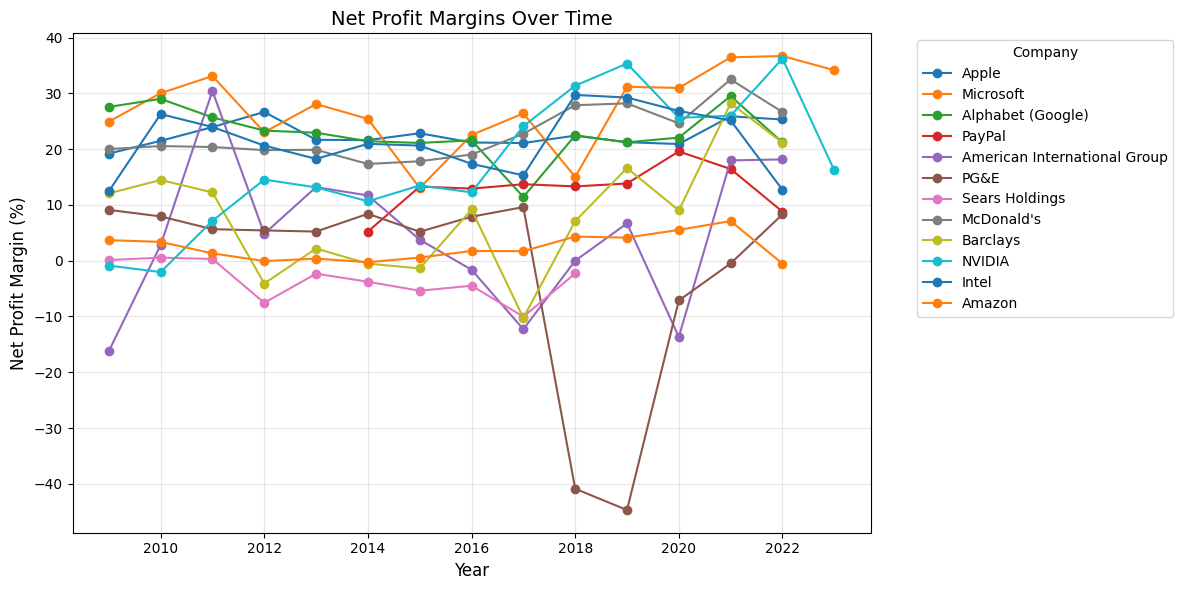

In [64]:
# Plot Net Profit Margin Over Time
plt.figure(figsize=(12, 6))
for company in df['COMPANY'].unique():
    company_data = df[df['COMPANY'] == company]
    plt.plot(company_data['YEAR'], company_data['NET PROFIT MARGIN'], label=company, marker='o')

plt.title("Net Profit Margins Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Profit Margin (%)", fontsize=12)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


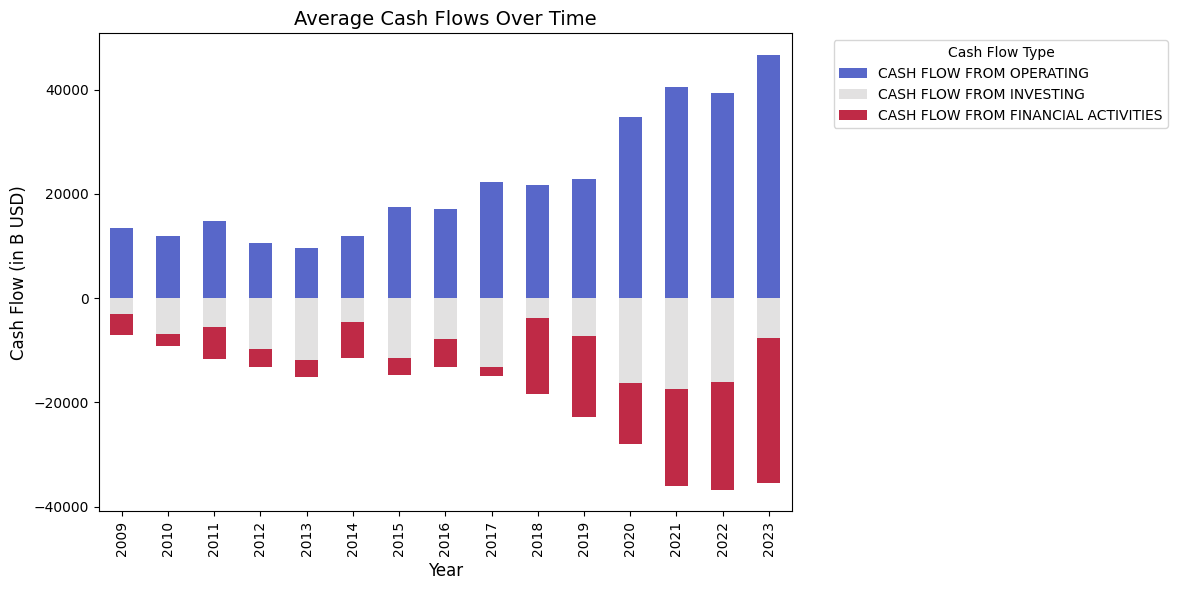

In [65]:
# Group by year and calculate mean cash flows
cash_flow_data = df.groupby('YEAR')[['CASH FLOW FROM OPERATING', 
                                                 'CASH FLOW FROM INVESTING', 
                                                 'CASH FLOW FROM FINANCIAL ACTIVITIES']].mean()

# Plot
cash_flow_data.plot(kind='bar', stacked=True, figsize=(12, 6), cmap="coolwarm", alpha=0.85)
plt.title("Average Cash Flows Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cash Flow (in B USD)", fontsize=12)
plt.legend(title="Cash Flow Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


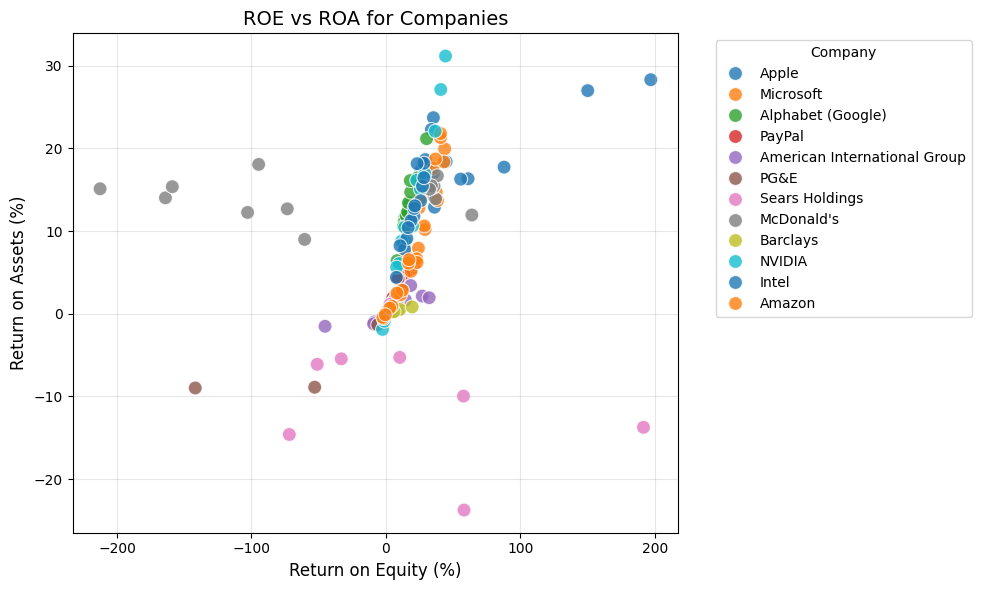

In [66]:
# Scatter plot for ROE vs ROA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="ROE", 
    y="ROA", 
    hue="COMPANY", 
    palette="tab10", 
    s=100, 
    alpha=0.8
)
plt.title("ROE vs ROA for Companies", fontsize=14)
plt.xlabel("Return on Equity (%)", fontsize=12)
plt.ylabel("Return on Assets (%)", fontsize=12)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12300\1567883112.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




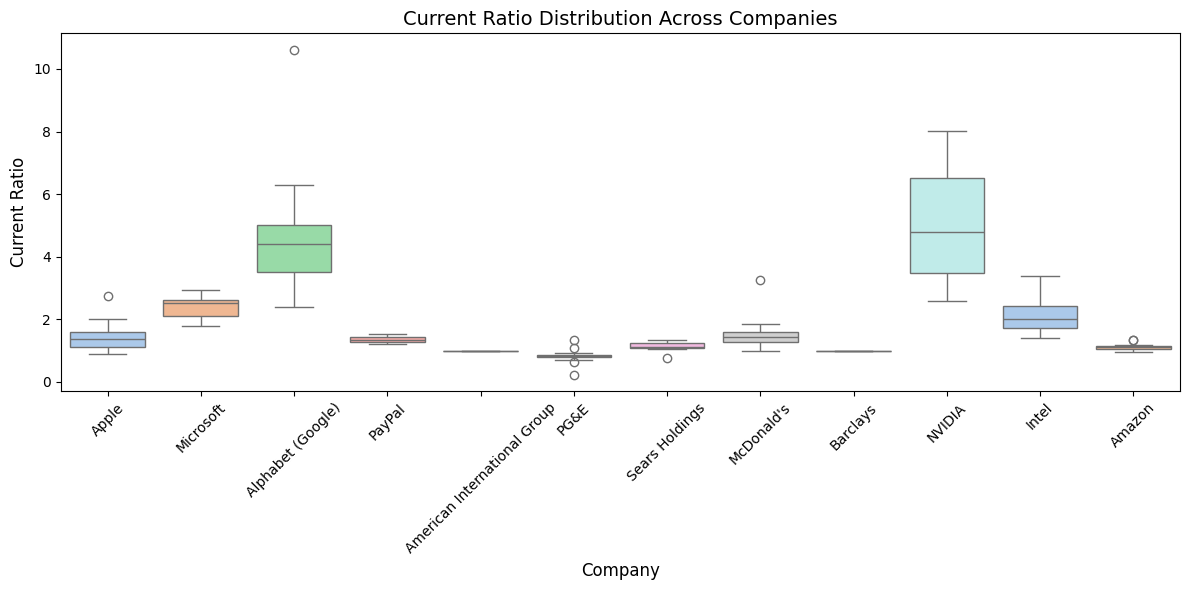

In [67]:
# Boxplot for Current Ratio across companies
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x="COMPANY", 
    y="CURRENT RATIO", 
    palette="pastel"
)
plt.title("Current Ratio Distribution Across Companies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Current Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
